The dataset I am experimenting is the spam.csv dataset from one of the Kaggle competitions.

In [208]:
import pandas as pd
import numpy as np

In [209]:
msg = pd.read_csv('spam.csv', encoding = 'latin-1')

msg.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


There are 2 lables present: ham (legitimate) and spam.

In [210]:
msg.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


We see columns [Unnamed: 2	Unnamed: 3	Unnamed: 4] have very few counts compared to the other two and most of that are NaN. So we will remove them.

In [211]:
msg = msg[['v1','v2']]

msg.rename(columns={"v1": "label", "v2": "message"}, inplace= True)

msg.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Next, we need to enconde "ham" and "spam" labels numerically. Let's set "ham" = 0 and "spam" = 1.

In [212]:
msg['label'][msg['label'] == 'ham'] = 0
msg['label'][msg['label'] == 'spam'] = 1

First of all, we need to convert all upper case to lower case to make sure that for the same word, they are classifed as the same. 

In [213]:
def lower(x):
    return x.lower()

In [214]:
msg['message'] = msg['message'].apply(lower)
msg.head()

,label,message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


I will make use of NTLK for further processing the messages. Next, we need to tonkenize each message. It is to split up a message into distinct pieces and disregards unimportant parts such as punctuation and stop words.

In [215]:
import nltk
#nltk.download('punkt')

In [216]:
from nltk.tokenize import word_tokenize

In [217]:
def tokenize(x):
    comps = word_tokenize(x)
    comps = [i for i in comps if len(i) > 1]
    return comps

In [218]:
msg['message'] = msg['message'].apply(tokenize)
msg.head()

,label,message
0,0,"[go, until, jurong, point, crazy.., available,..."
1,0,"[ok, lar, ..., joking, wif, oni, ...]"
2,1,"[free, entry, in, wkly, comp, to, win, fa, cup..."
3,0,"[dun, say, so, early, hor, ..., already, then,..."
4,0,"[nah, do, n't, think, he, goes, to, usf, he, l..."


Next, we need to remove the stop words which are those that occur frequently such as articles.

In [219]:
from nltk.corpus import stopwords
#nltk.download('stopwords')

In [220]:
eng_sw = stopwords.words('english') #list of all stop words in English

In [221]:
def stopword(x):
    x = [i for i in x if i not in eng_sw ]
    return x

In [222]:
msg['message'] = msg['message'].apply(stopword)
msg.head()

,label,message
0,0,"[go, jurong, point, crazy.., available, bugis,..."
1,0,"[ok, lar, ..., joking, wif, oni, ...]"
2,1,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,0,"[dun, say, early, hor, ..., already, say, ...]"
4,0,"[nah, n't, think, goes, usf, lives, around, th..."


Next, I will apply a algorithm called Lemmatization to reduce noise in the text by transforming the words to their base form. For example, runs, running, ran are all forms of the word run, therefore run is the lemma of all these words.

In [223]:
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')

In [224]:
def lemmatizer(x):
    x = [WordNetLemmatizer().lemmatize(i, pos ="v") for i in x]
    return x

In [225]:
msg['message'] = msg['message'].apply(lemmatizer)
msg.head()

,label,message
0,0,"[go, jurong, point, crazy.., available, bugis,..."
1,0,"[ok, lar, ..., joke, wif, oni, ...]"
2,1,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,0,"[dun, say, early, hor, ..., already, say, ...]"
4,0,"[nah, n't, think, go, usf, live, around, though]"


Let's do some EDA and visualization before we split the data set

In [226]:
print("Proportion of spam: {}".format(msg['label'].value_counts()[1]/(len(msg))))

Proportion of spam: 0.13406317300789664


Let's get a word cloud to see which words appear most in spam

In [227]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [230]:
seperator = " "
spam_words = seperator.join([str(i) for i in list(msg[msg['label'] == 1]['message'])])

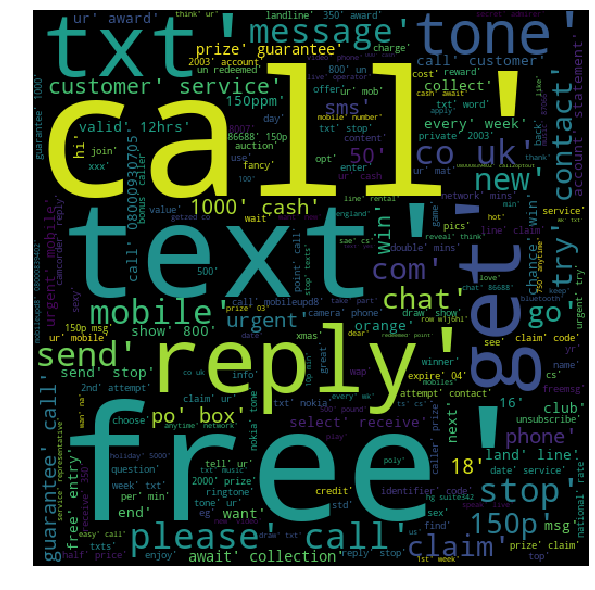

In [231]:
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'w')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In contrast, legitimate messages would have:

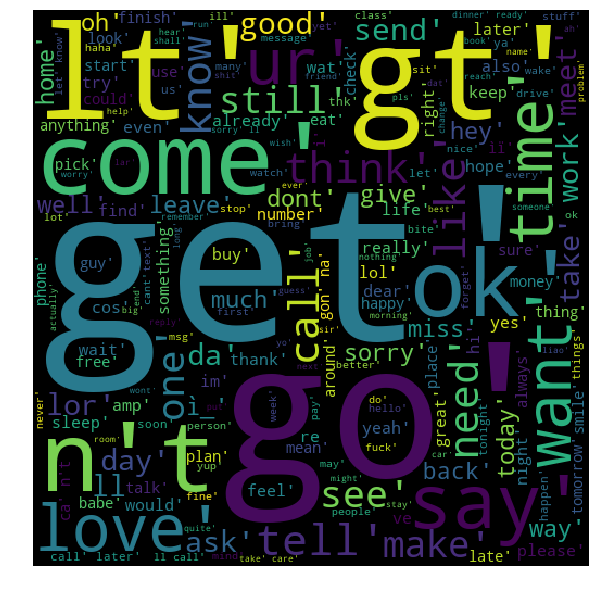

In [232]:
legit_words = seperator.join([str(i) for i in list(msg[msg['label'] == 0]['message'])])
legit_wc = WordCloud(width = 512,height = 512).generate(legit_words)
plt.figure(figsize = (10, 8), facecolor = 'w')
plt.imshow(legit_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

For our training purposes, we will need a train set and a test set. Hence, we'll do so.

In [233]:
from sklearn.model_selection import train_test_split

train_msg, test_msg = train_test_split(msg, test_size=0.2, random_state=42)


train_msg.reset_index(inplace = True)
train_msg.drop(['index'], axis = 1, inplace = True)

train_msg.head()

C:\Users\tring\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,label,message
0,0,"['m, boat, still, moms, check, yo, 'm, half, n..."
1,1,"[bank, granite, issue, strong-buy, explosive, ..."
2,0,"[give, second, chance, rahul, dengra]"
3,0,"[play, smash, bros, lt, gt, religiously]"
4,1,"[private, 2003, account, statement, 0797378824..."


In [234]:
test_msg.reset_index(inplace = True)
test_msg.drop(['index'], axis = 1, inplace = True)

test_msg.head()

,label,message
0,0,"[funny, fact, nobody, teach, volcanoes, erupt,..."
1,0,"[send, score, sophas, secondary, application, ..."
2,1,"[know, someone, know, fancy, call, 09058097218..."
3,0,"[promise, get, soon, 'll, text, morning, let, ..."
4,1,"[congratulations, ur, award, either, å£500, cd..."


For the problem we'll implement the TF-IDF algorithm, which stands for Term Frequency-Inverse Document Frequency. Term frequency is the proportion of number of occurences of a word over the the total number of words in the dataset.

Inverse Document Frequency is the log of the proportion of the total number of messages over the total number of messages containing a word, thus highlighting the rarity of the word.

In [235]:
#No of ham, spam in train dataset
train_hams, train_spams = train_msg['label'].value_counts()[0], train_msg['label'].value_counts()[1]

total_train_msg = len(train_msg)

In [236]:
from collections import defaultdict
from math import log, sqrt

In [242]:
train_messages = train_msg['message']
train_labels = train_msg['label']

In [332]:
#Function to return the Inverse Document Frequency (IDF) value dictionary for all the words in the messages"

def get_idf(messages):
    
    idf = defaultdict(int)
    
    for i in range(len(messages)):
    
        for word in set(messages[i]):
            
            idf[word] += 1 

    idf = dict(idf)
    
    idf.update((x, log(len(messages)/y)) for x, y in idf.items())
    
    return idf

In [333]:
train_idf = get_idf(train_messages)

Function to return Term Frequency value dictionaries that returns TF dictionaries for spam messages or ham messages.

In this case, for simplicity, TF of words that repeat themselves in different sentences are at taken average value and count as one single entry in the dictionary. In more complicated approach, each word have a vector of different TF values with length equal to the number of messages.

In [335]:
def get_tf(messages, labels):
    
    spam_tf = defaultdict(int)
    count_spam_keys = defaultdict(int) #for taking average
    
    
    ham_tf = defaultdict(int)
    count_ham_keys = defaultdict(int)
    
    for i in range(len(messages)):
        
        word_count = list()
        for word in messages[i]:
            word_count += [word]
        
        tf = dict(Counter(word_count))
        tf.update((x, y/len(train_messages[i])) for x, y in tf.items())
        
        if labels[i]:
            for word, _ in tf.items():
                spam_tf[word] += tf[word]
                count_spam_keys[word] += 1
        else:
            for word, _ in tf.items():
                ham_tf[word] += tf[word]
                count_ham_keys[word] += 1
            
     
    spam_tf = dict(spam_tf)        
    spam_tf.update((x, y/count_spam_keys[x]) for x, y in spam_tf.items())
            
    ham_tf = dict(ham_tf)        
    ham_tf.update((x, y/count_ham_keys[x]) for x, y in ham_tf.items())
            
    return spam_tf, ham_tf

In [336]:
train_spam_tf, train_ham_tf = get_tf(train_messages, train_labels)

In [337]:
#TF for all words in the set

def get_all_tf(messages):
    
    all_tf = defaultdict(int)
    count_keys = defaultdict(int) #for taking average
    
    
    for i in range(len(messages)):
        
        word_count = list()
        for word in messages[i]:
            word_count += [word]
        
        tf = dict(Counter(word_count))
        tf.update((x, y/len(train_messages[i])) for x, y in tf.items())
       
        for word, _ in tf.items():
            all_tf[word] += tf[word]
            count_keys[word] += 1
       
            
     
    all_tf = dict(all_tf)        
    all_tf.update((x, y/count_keys[x]) for x, y in all_tf.items())
    
    return all_tf


In [338]:
all_train_tf = get_all_tf(train_messages)

In [339]:
def get_tf_idf(tf,idf): #to get tf-idf product 
    
    tf_idf = dict()
    
    for word,_ in tf.items():
    
        tf_idf[word] = tf[word] * idf[word]
    return tf_idf

In [340]:
tf_idf_all = get_tf_idf(all_train_tf, train_idf)

#sum of tf_idf all

tf_idf_sum = sum(tf_idf_all.values())

In [341]:
#Formula to get probability using TF-IDF

def prob(tf, idf, tf_idf_all, n, alpha=1): #alpha = 1, Laplace smoothing.
    
    tf_idf_all = get_tf_idf(all_train_tf, train_idf)
    tf_idf_sum = sum(tf_idf_all.values())
    
    
    tf_idf = get_tf_idf(tf,idf)
    
    probability = dict() 
    
    for word,_ in tf_idf.items():
        
        probability[word] = (tf_idf[word] + alpha) / (tf_idf_sum + alpha * n)
    
    return probability

In [342]:
prop_w_given_spam = prob(train_spam_tf,train_idf, tf_idf_all,n = len(train_msg))  #P(W | Spam)
prop_w_given_ham = prob(train_ham_tf,train_idf, tf_idf_all,n = len(train_msg)) #P(W | Ham)

In [343]:
prop_train_spam = train_spams / (train_hams + train_spams) #P(Spam)
prop_train_ham = train_hams / (train_hams + train_spams) #P(Ham)

print("P(Spam) in train set is {}".format(prop_train_spam))

print("P(Ham) in train set is {}".format(prop_train_ham))

P(Spam) in train set is 0.13394660085259144
P(Ham) in train set is 0.8660533991474085


Applying the Bayes' Theorem

In [344]:
p_w = defaultdict(int)
word_count = 0

for msg in train_messages:
    for word in msg: 
        p_w[word] += 1 
        word_count += 1
    
p_w = dict(p_w) #P(w)
p_w.update((x, y/word_count) for x, y in p_w.items())
    

In [345]:
prop_spam_given_w = dict()
prop_ham_given_w = dict()

for word, cond_prop in prop_w_given_spam.items():
    prop_spam_given_w[word] = cond_prop * prop_train_spam / p_w[word]
    
for word, cond_prop in prop_w_given_ham.items():
    prop_ham_given_w[word] = cond_prop * prop_train_ham / p_w[word]

In [346]:
prop_w_given_spam

{'bank': 0.0001300462647082952,
 'granite': 0.00013887993701356655,
 'issue': 0.00013242762214636704,
 'strong-buy': 0.00013887993701356655,
 'explosive': 0.00013887993701356655,
 'pick': 0.00011968359817371858,
 'members': 0.00013359421369402865,
 '*****up': 0.00013887993701356655,
 '300': 0.00013066517832061017,
 '***********': 0.00013644272638546647,
 'nasdaq': 0.00013887993701356655,
 'symbol': 0.00013649857957549465,
 'cdgt': 0.00013887993701356655,
 '5.00': 0.00013887993701356655,
 'per..': 0.00013887993701356655,
 'private': 0.00012422474741146392,
 '2003': 0.00012520675473512137,
 'account': 0.00012204542529354946,
 'statement': 0.00012422474741146392,
 '07973788240': 0.00013499684616758323,
 'show': 0.00011664380082512571,
 '800': 0.00012456850262884762,
 'un-redeemed': 0.00012520675473512137,
 's.': 0.00012520675473512137,
 'i.': 0.00012520675473512137,
 'm.': 0.00012520675473512137,
 'point': 0.00012046307821681044,
 'call': 0.00010931984074679625,
 '08715203649': 0.00013499

In [347]:
prop_ham_given_w

{"'m": 0.01463834564904792,
 'boat': 2.0842833791729998,
 'still': 0.04089161327937143,
 'moms': 1.3874274715113695,
 'check': 0.13384977503450374,
 'yo': 0.20299343612251858,
 'half': 0.19650424334114253,
 'naked': 1.6934512140657234,
 'give': 0.04960581186203196,
 'second': 0.3472479001081925,
 'chance': 0.20332343227011926,
 'rahul': 9.110822240586137,
 'dengra': 9.110822240586137,
 'play': 0.14448153158769209,
 'smash': 3.2592076953851548,
 'bros': 8.15885096489347,
 'lt': 0.0177730457811911,
 'gt': 0.017816971510020277,
 'religiously': 8.15885096489347,
 'say': 0.02498933150097787,
 'never': 0.146770991471615,
 'answer': 0.2898174816310582,
 'texts': 0.25376139239412215,
 'confirm/deny': 9.110822240586137,
 'okey': 2.3414089978624557,
 'dokey': 4.101451312557,
 'i\x89û÷ll': 2.3167810603138332,
 'bite': 0.12672763010628343,
 'sort': 0.35896965777129825,
 'stuff': 0.1492100878306545,
 'come': 0.018900324722364793,
 'people': 0.11382461846237373,
 'wah': 1.3514346184089834,
 'lucky':